**ASSIGNMENT 5.1** <br><br>
*Household food waste by country* <br><br><br>
**Description:** <br><br>
*The dataset to be examined is one that covers the average amount of food wastage
by country. The dataset examines chicken in particular and the kg per capita wasted
by each country. With the data in this set being restricted towards just one
specific type of food, the results of this analysis should keep that in mind, as
some countries may eat more chicken than others and, by consequence, have higher
wastage per capita.*



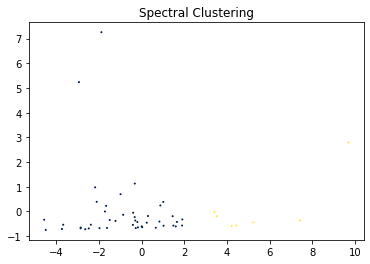

In [12]:
# Import the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler

%matplotlib inline

data = pd.read_csv('household_foodwaste_21_cleaned.csv')
data.drop(['Continent', 'Regions', 'country'], axis=1, inplace=True)
data.head()

imputer = SimpleImputer(strategy="mean")
data_imputed = imputer.fit_transform(data)

scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_imputed)

pca = PCA(n_components=3)
data_pca = pca.fit_transform(data_normalized)

spectral_cluster = SpectralClustering(n_clusters=2, affinity="laplacian", assign_labels='kmeans')
labels = spectral_cluster.fit_predict(data_normalized)

data['Cluster'] = labels

plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, s=1, cmap='cividis')

plt.title('Spectral Clustering')
plt.show()

**Conclusion and Findings:** <br><br>
*The dataset to be examined is one that covers the average amount of food wastage
by country. The dataset itself is a bit limited in coverage, so the data points are
quite sparse, but we can still draw conclusions nonetheless. From the plot, we can
clearly see that the data, while not tightly clustered, still tends to group up
around the bottom part of the graph. However, there are still some outliers which
stray from the trend.*


**ASSIGNMENT 5.2** <br><br>

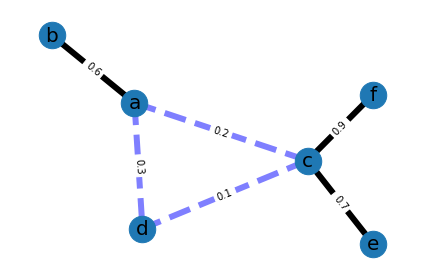

a: 0.19748104211845458
b: 0.10067079156354408
c: 0.6959564646836508
d: 0.10946553425133651
e: 0.41391096928695104
f: 0.5321712462260803


In [19]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

G.add_edge("a", "b", weight=0.6)
G.add_edge("a", "c", weight=0.2)
G.add_edge("c", "d", weight=0.1)
G.add_edge("c", "e", weight=0.7)
G.add_edge("c", "f", weight=0.9)
G.add_edge("a", "d", weight=0.3)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

eig_central = nx.eigenvector_centrality_numpy(G, weight='weight')
for e, c in eig_central.items():
    print(str(e) + ": " + str(c))

**ASSIGNMENT 5.3** <br><br>

Subreddit Name: facepalm
Subreddit Description: now double verified
Centrality Nodes based on corresponding Eigenvectors: [Redditor(name='thewrongun'), Redditor(name='IranianGenius'), Redditor(name='Wynomas'), Redditor(name='NissEhkiin'), Redditor(name='prplehailstorm')]


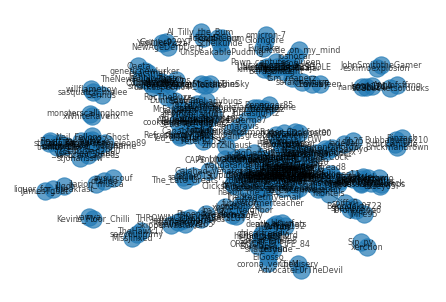

Highest Eigenvector Centrality Scores:

thewrongun: 0.695473
IranianGenius: 0.130879
Wynomas: 0.130591
NissEhkiin: 0.120646
prplehailstorm: 0.120226
K1ll-All-Humans: 0.117584
hoboforlife: 0.116991
Jewish_Jitsu: 0.116835
AsianInvasion00: 0.114163
kateshakes: 0.113928


In [24]:
import praw
import networkx as nx
import matplotlib.pyplot as plt

reddit = praw.Reddit(
    client_id = "P3y5wDWmFqEJ8A",
    client_secret = "sReJnw2xqq2ZYZBYgxae6pYp4H0",
    user_agent = "PL_SocialMedia",
)

def print_subreddit_info(subreddit):
    print(f"Subreddit Name: {subreddit.display_name}")
    print(f"Subreddit Description: {subreddit.title}")

def get_top_post_id(subreddit):
    return subreddit.top(limit=1).__next__().id

def create_social_network(post_id):
    submission = reddit.submission(id=post_id)
    G = nx.Graph()

    for comment in submission.comments.list():
        if isinstance(comment, praw.models.MoreComments):
            continue

        if comment.author and comment.parent() and comment.parent().author:
            G.add_edge(comment.author, comment.parent().author)

    return G

def perform_social_network_analysis(social_network):
    eigenvector_centrality = nx.eigenvector_centrality(social_network)
    sorted_nodes = sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True)
    top_nodes = sorted_nodes[:5]
    print("Centrality Nodes based on corresponding Eigenvectors:", top_nodes)

def visualize_network(social_network):
    pos = nx.spring_layout(social_network)
    nx.draw(social_network, pos, with_labels=True, font_size=8, font_color="black", alpha=0.7)
    plt.show()

subreddit_name = "facepalm"
subreddit = reddit.subreddit(subreddit_name)
print_subreddit_info(subreddit)
post_id = get_top_post_id(subreddit)
social_network = create_social_network(post_id)
perform_social_network_analysis(social_network)
visualize_network(social_network)

eigenvector_centrality = nx.eigenvector_centrality_numpy(social_network)

print("Highest Eigenvector Centrality Scores:\n")
highest_scores = dict(sorted(eigenvector_centrality.items(), key=lambda item: item[1], reverse=True))

for i, (redditor, centrality) in enumerate(highest_scores.items()):
    print(f"{redditor}: {centrality.round(6)}")

    if i == 9:
        break

**Hypothesis**<br>
*In the "facepalm" subreddit, the theme is mostly people posting videos about situations that may make one disappointed/annoyed, hence facepalm. The commenters of the highest upvoted post are taken into account and are important for community engagement. This engagement can be analyzed using eigenvector centrality.*

**Conclusion**<br>
*Eigenvector centrality measures the influence of the different nodes related to the graph. In this case, the node with the highest eigenvector centrality score is "thewrongun". It also so happens that he is the author of the top post in question, which makes the eigenvector centrality method rate him highly, as the interaction caused in the top post is due to him uploading the post itself. Following that, we can see other users who have carried much engagement, usually those who have the highest upvote counts on certain replies.*